In [11]:
import pandas as pd

# Load dataset
filename = "./pre/INFD_Pred.csv" #IFND.csv"

# Use 'errors' parameter to handle invalid byte sequences
with open(filename, 'r', encoding='utf-8', errors='replace') as file:
    data = pd.read_csv(file)

# Custom function to convert dates and handle errors
def convert_date(date_str, date_format):
    try:
        return pd.to_datetime(date_str, format=date_format)
    except ValueError:
        return None #pd.Timestamp('1900-01-01')

# Convert 'Date' column to datetime
data['Date'] = data['Date'].apply(lambda x: convert_date(x, "%b-%y"))


# Preprocess text data (e.g., tokenization, lowercasing, etc.)
# ... Add preprocessing steps here


In [12]:
print(data['Date'])

0       2020-10-01
1       2020-10-01
2       2020-10-01
3       2020-10-01
4       2020-10-01
           ...    
56709          NaT
56710          NaT
56711          NaT
56712          NaT
56713          NaT
Name: Date, Length: 56714, dtype: datetime64[ns]


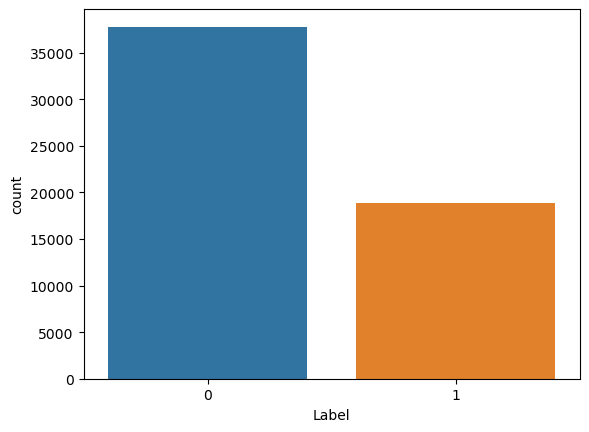

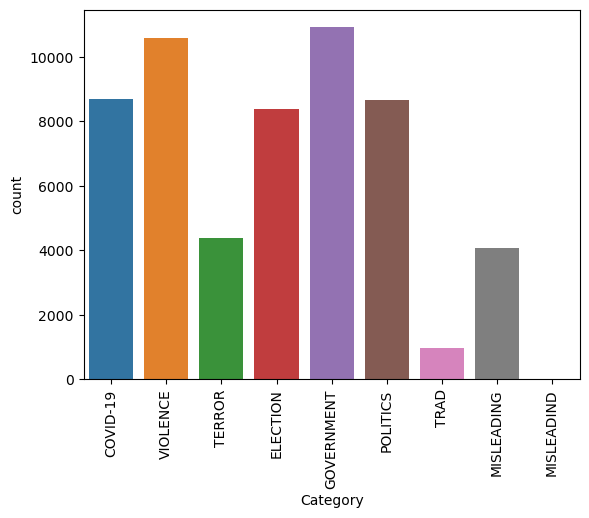

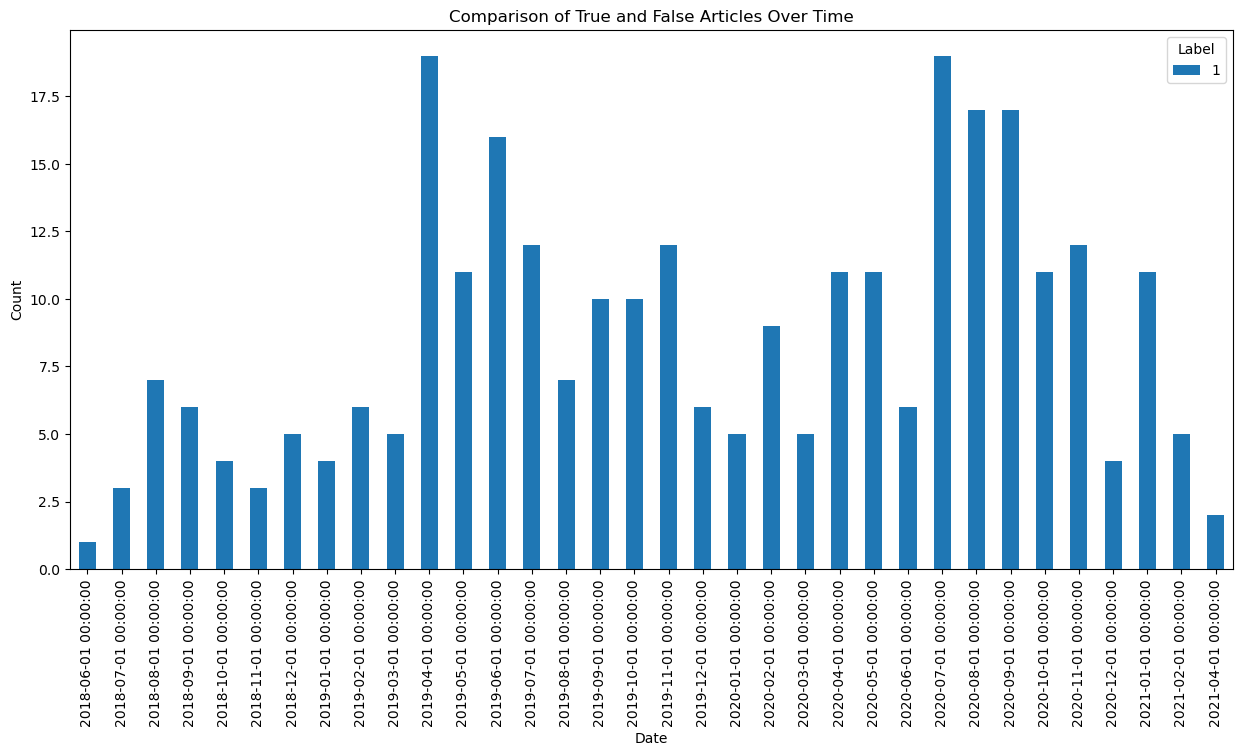

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of real and fake news
sns.countplot(data=data, x='Label')
plt.show()

# Plot the distribution of news categories
sns.countplot(data=data, x='Category')
plt.xticks(rotation=90)
plt.show()

# Filter the data to keep only rows with 'Label' equal to 'Fake'
fake_data = data[data['Label'] == 1]
# Group by date and label, and count the number of articles
articles_per_month = fake_data.groupby(['Date', 'Label']).size().reset_index(name='Count')

# Create a pivot table with YearMonth as index, Label as columns, and Count as values
pivot_table = articles_per_month.pivot_table(index='Date', columns='Label', values='Count', fill_value=0)

# Plot the bar chart comparing true and false articles for each date
pivot_table.plot(kind='bar', stacked=False, figsize=(15, 7))
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Comparison of True and False Articles Over Time')
plt.show()



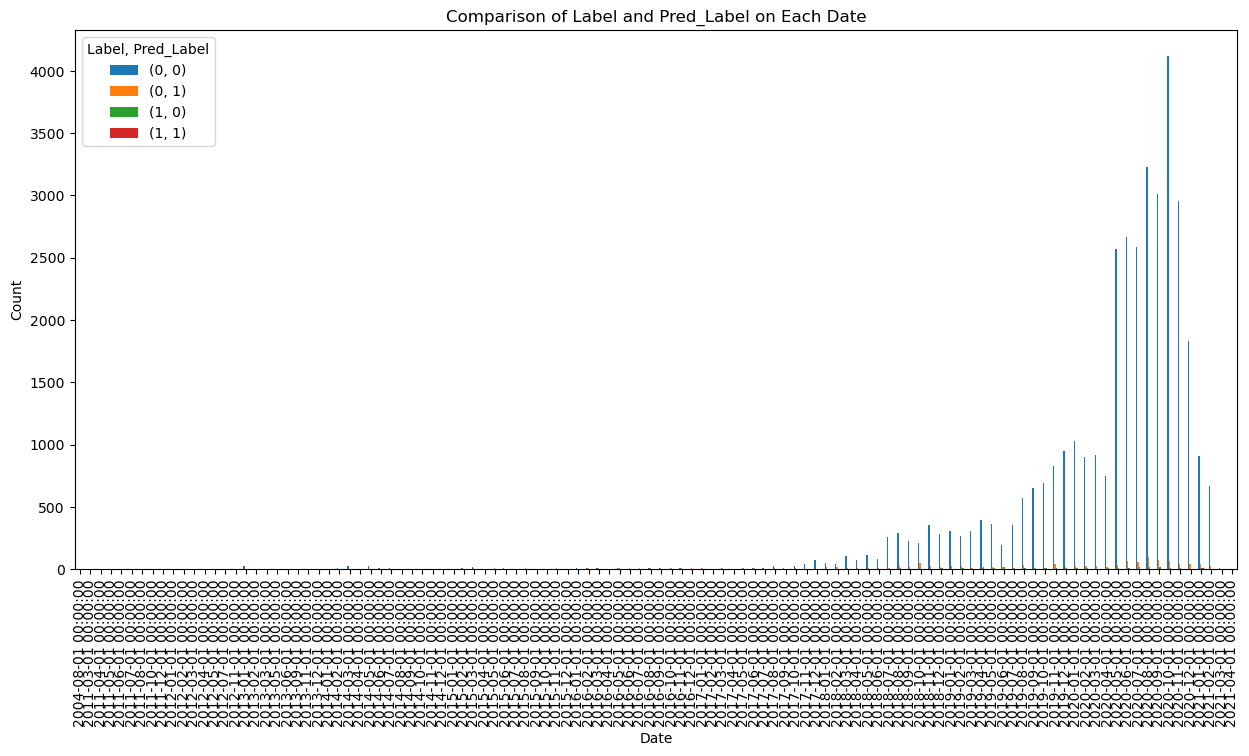

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by date, label, and pred_label, and count the number of articles
articles_per_date = data.groupby(['Date', 'Label', 'Pred_Label']).size().reset_index(name='Count')

# Create a pivot table with Date as index, Label and Pred_Label as columns, and Count as values
pivot_table = articles_per_date.pivot_table(index='Date', columns=['Label', 'Pred_Label'], values='Count', fill_value=0)

# Plot the bar chart comparing Label and Pred_Label for each date
pivot_table.plot(kind='bar', stacked=False, figsize=(15, 7))
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Comparison of Label and Pred_Label on Each Date')
plt.legend(title="Label, Pred_Label")
plt.show()


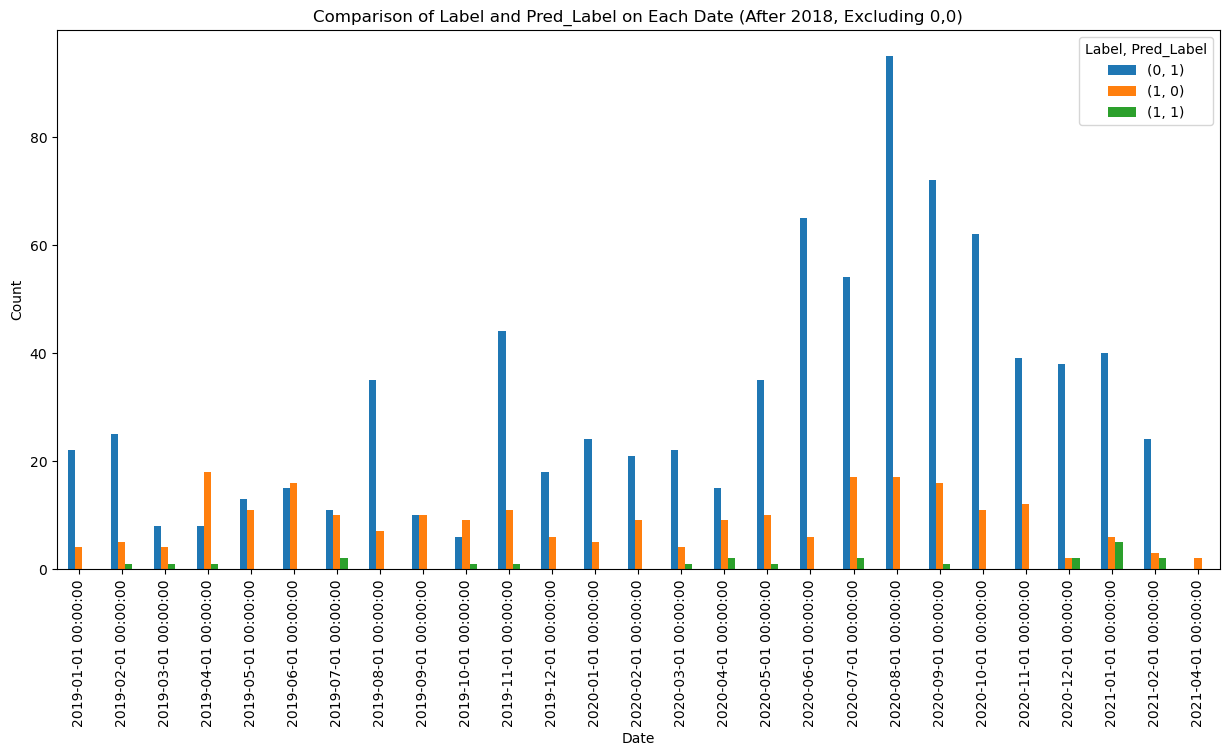

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Filter the data to show only dates after 2018
filtered_data = data[data['Date'].dt.year > 2018]

# Filter the data to remove rows with both 'Label' and 'Pred_Label' equal to 0
filtered_data = filtered_data[~((filtered_data['Label'] == 0) & (filtered_data['Pred_Label'] == 0))]

# Group by date, label, and pred_label, and count the number of articles
articles_per_date = filtered_data.groupby(['Date', 'Label', 'Pred_Label']).size().reset_index(name='Count')

# Create a pivot table with Date as index, Label and Pred_Label as columns, and Count as values
pivot_table = articles_per_date.pivot_table(index='Date', columns=['Label', 'Pred_Label'], values='Count', fill_value=0)

# Plot the bar chart comparing Label and Pred_Label for each date
pivot_table.plot(kind='bar', stacked=False, figsize=(15, 7))
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Comparison of Label and Pred_Label on Each Date (After 2018, Excluding 0,0)')
plt.legend(title="Label, Pred_Label")
plt.show()


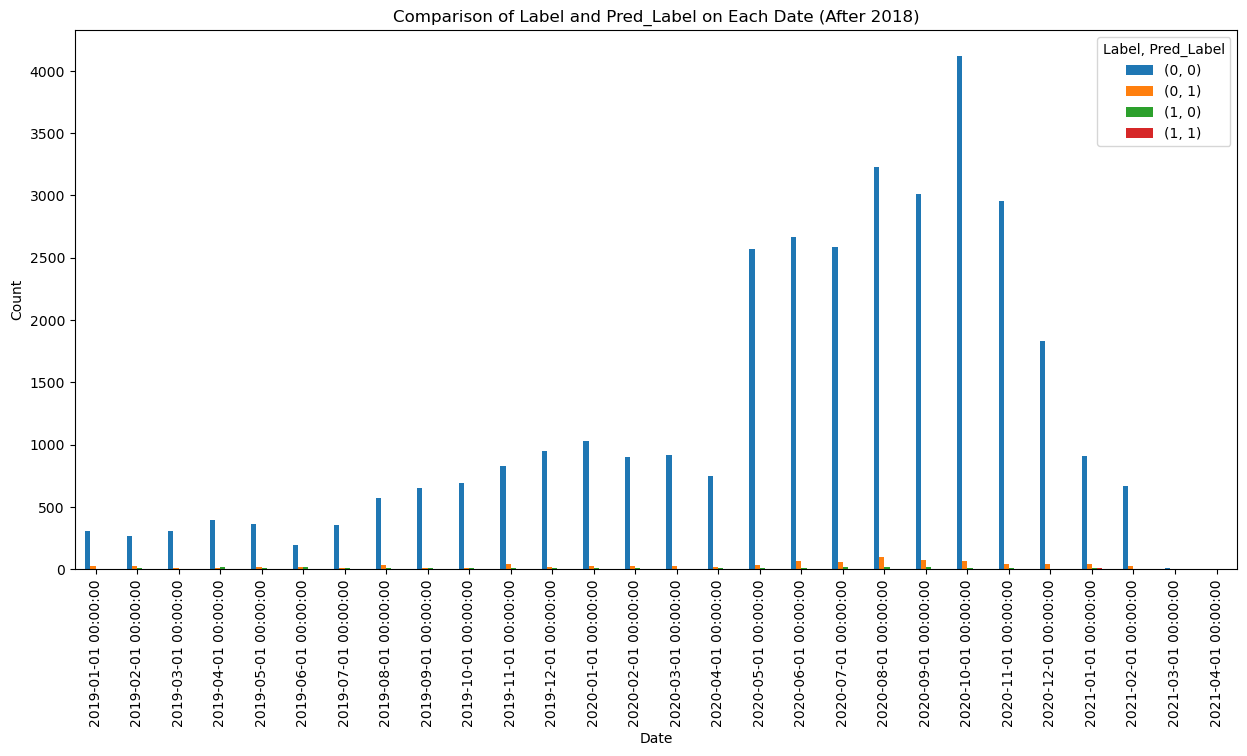

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Filter the data to show only dates after 2018
filtered_data = data[data['Date'].dt.year > 2018]

# Group by date, label, and pred_label, and count the number of articles
articles_per_date = filtered_data.groupby(['Date', 'Label', 'Pred_Label']).size().reset_index(name='Count')

# Create a pivot table with Date as index, Label and Pred_Label as columns, and Count as values
pivot_table = articles_per_date.pivot_table(index='Date', columns=['Label', 'Pred_Label'], values='Count', fill_value=0)

# Plot the bar chart comparing Label and Pred_Label for each date
pivot_table.plot(kind='bar', stacked=False, figsize=(15, 7))
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Comparison of Label and Pred_Label on Each Date (After 2018)')
plt.legend(title="Label, Pred_Label")
plt.show()


In [17]:
import pandas as pd
from scipy.stats import chi2_contingency

categories = data['Category'].unique()

for category in categories:
    print(f"Category: {category}")
    
    # Filter the data for the current category
    category_data = data[data['Category'] == category]
    
    # Create a contingency table for Label and Pred_Label within the category
    contingency_table = pd.crosstab(category_data['Label'], category_data['Pred_Label'])
    print("Contingency Table:")
    print(contingency_table)
    
    # Perform a chi-squared test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Print the results
    print(f"Chi-Squared: {chi2}")
    print(f"P-value: {p_value}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)
    print("\n")


Category: COVID-19
Contingency Table:
Pred_Label     0    1
Label                
0           5729  191
1           1872  918
Chi-Squared: 1500.3965077545117
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
[[5166.23650976  753.76349024]
 [2434.76349024  355.23650976]]


Category: VIOLENCE
Contingency Table:
Pred_Label     0     1
Label                 
0           5468   146
1           3252  1712
Chi-Squared: 1847.881554634002
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
[[4627.91453961  986.08546039]
 [4092.08546039  871.91453961]]


Category: TERROR
Contingency Table:
Pred_Label     0    1
Label                
0           4119  265
Chi-Squared: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies:
[[4119.  265.]]


Category: ELECTION
Contingency Table:
Pred_Label     0    1
Label                
0           8080  207
1             85   24
Chi-Squared: 146.0085954306511
P-value: 1.2925937156425944e-33
Degrees of Freedom: 1
Expected Frequencies:
[[8.058998